# **Assignment 1**: Simulation of a Lennard-Jones 2-dimensional system

This assignment, together with the next one, will setup and run a simulation of a 2-dimensional system of particles governed by [Lennard-Jones (LJ) interactions](https://en.wikipedia.org/wiki/Lennard-Jones_potential).

This is an exercise. There may be better ways to do the tasks.

We will start with some imports

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

## Exercise 1 (2 points)

Put `N` particles in a box of size `box`.

In [24]:
box = np.array((5,5))
N=8
rng = np.random.default_rng(12345)

In [25]:
particle_xy = rng.uniform(low=0, high=box, size=(N, 2))
print("Particle positions:\n", particle_xy)


Particle positions:
 [[1.13668011 1.5837917 ]
 [3.98682729 3.38127335]
 [1.95554775 1.66406964]
 [2.99154377 0.93367093]
 [3.36378022 4.70901433]
 [1.24122857 4.74440576]
 [3.33618727 0.47948968]
 [2.20919833 4.4323996 ]]


Define a function that puts the particles randomly:
```
Parameters:
    N (int): number of particles
    box (array of shape (d,)) : the box size in each dimension
Returns:
    pos (array of shape (N,d)): the particle positions
```

In [26]:

def put_particles(N: int, box: np.array) -> np.array:
    """Randomly puts N# 2D particles into a box given:
       - N:   the number of particles
       - box: a numpy array to store them
        
        Returns: 
        - a numpy array containing the coordinates of the particles"""
    
    #NOTE - to maintain the same "random" numbers, pass a number (seed) into the default_rng() function below
    rng = np.random.default_rng()
    pos = rng.uniform(low=0, high=box, size=(N, 2))
    return pos

put_particles(N, box)

array([[4.9430497 , 4.17653303],
       [3.75711601, 1.96929784],
       [0.69779184, 3.84331861],
       [2.63952794, 3.45951213],
       [4.16559154, 2.39819136],
       [3.55891307, 3.19266295],
       [3.95249052, 4.12552964],
       [0.46519541, 3.74047262]])

Calculate the distances between all pairs of particles, keep them in the container you prefer.
Write a loop so that, if the distance between two particles is smaller than 1, `put_particles`is called again until all distances are larger than 1.

In [27]:
#exploiting the "True" nature of 1 vs 0. Once the length of the list "too_close" is zero, the loop will stop
too_close = 1
while too_close:
    container = put_particles(N, box)
    container_distances = pdist(container)
    too_close = len([i for i in container_distances if i < 1])


## Exercise 2 (3 points)

* Plot the particles. Make sure the plot is square as the box is (the aspect ratio of the plot is 1).
* Print the distance between the 2 particles that are closest to each other (which should be larger than 1).
* on top of the previous plot, plot the 2 particles that are closest to each other (with a different marker or a different colour)

Min distance 1.134 between points 3 ([3.47284711 3.44006654]) and 7 ([2.66548778 2.64434616])


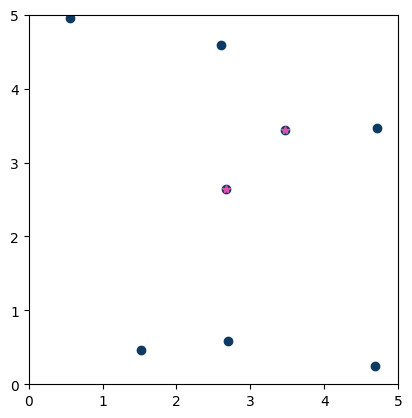

In [28]:
#without turning this into a squareform, the container_distances array would be
#7 values for element 1-8, followed by 6 values for 2-8, 5 for 3-8, etc.
#while doable for an 8-element array, squareform is actually scalable
dist_matrix = squareform(container_distances)
#fill in the values of the 0 diagonals (element's distance to itself)
np.fill_diagonal(dist_matrix,100)
#determine the minimum distance and which points share that value
min_distance = np.min(dist_matrix)
min_pt1 = np.where(dist_matrix == min_distance)[0][0]
min_pt2 = np.where(dist_matrix == min_distance)[1][0]
print(f"Min distance {min_distance:.3f} between points {min_pt1} ({container[min_pt1]}) and {min_pt2} ({container[min_pt2]})")

plt.show(False)
#set aspect ratio to 1:1
plt.subplots()[1].set_aspect('equal')
plt.xlim(0,5)
plt.ylim(0,5)
#plot all points
plt.plot(container[:,0],container[:,1], 'o', color="#0E3A62")
#highlight the closest 2
plt.plot(container[min_pt1][0],container[min_pt1][1], '*', color="#D854AC")
plt.plot(container[min_pt2][0],container[min_pt2][1], '*', color="#D854AC")
plt.show(True)



## Exercise 3 (4 points)

Define a function that calculates the LJ potential with the following interfase:
```
Parameters:
    r (float): the distance between 2 particles
    eps(float), optional : the epsilon parameter, defaults to 1.0
    sigma(float), optional : the sigma parameter, defaults to 1.0
Returns:
    energy (float): the potential energy
```

In [29]:
def lj(r: float, eps: float = 1., sigma: float = 1.) -> float:
    """Calculates the LJ potential given:
       - r:     the distance between 2 particles
       - eps:   the epsilon parameter (defaults to 1.0)
       - sigma: the sigma parameter (defaults to 1.0)
       
       NOTE - Lennard-Jones potential is defined as:
              V_LJ (r) = 4*eps * ((sigma/r)^^12 - (sigma/r)^^6)
       
       Returns:
       - energy: the potential energy"""
    
    sigr6 = (sigma / r)**6
    sigr12 = (sigma / r)**12
    energy = 4 * eps * (sigr12 - sigr6)

    return energy

Define a function that, given the distances you have calculated, calculates the total energy of the system, as the sum of all LJ interactions.

as a test, give the output of the call of this function to the follwing distance array:
```
array([1.19019609, 1.24201208, 1.29964955, 1.37621088, 1.40173861,
       1.48479225, 1.50549561, 1.57248655, 1.67145854, 1.73024851,
       1.87166862, 2.46480529, 2.48592529, 2.56456494, 2.65684868,
       2.92247551, 3.04959329, 3.10102279, 3.12553025, 3.4283136 ,
       3.7427571 , 3.99905512, 4.09109109, 4.26886235, 4.4731483 ,
       4.62517134, 4.97622633, 5.01146084])
```

You could (if you want to) convert this 1-D array into a square 2-D array with [`scipy.spatial.distance.squareform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html). By the way, this module may be useful for other sections of this assignment.

In [30]:
def total_e(distances: np.array, eps: float = 1., sigma: float = 1.) -> float:
    """Calculates the total energy of a system, as the sum of all LJ interactions
       - distances: the distances between particles, as a numpy array which may be 1D (flat) or 2D (squareform)
       - eps:       epsilon value passed to lj function
       - sigma:     sigma value passed to lj function

       Requires:
       - numpy
       - lj function

       Returns:
       - (float): total energy of a system
    """

    if len(distances.shape) == 1:
        oneDarray = distances
    #2D array handling
    elif len(distances.shape) == 2:
        #passed in as squareform; check the diagonal and just return the unique pairwise distances
        if distances.diagonal().min() == distances.diagonal().max():
            oneDarray = distances[np.triu_indices(distances.shape[0],k=1)]
        #not squareform, user may have passed in coordinates instead of distances
        else:
            return "Error: 2D array passed is not squareform. Ensure array is of distances, not coordinates."
    else:
        return "Error: array must be 1D or 2D"
    
    return np.sum([lj(d) for d in oneDarray])

test_distances = np.array([1.19019609, 1.24201208, 1.29964955, 1.37621088, 1.40173861,
       1.48479225, 1.50549561, 1.57248655, 1.67145854, 1.73024851,
       1.87166862, 2.46480529, 2.48592529, 2.56456494, 2.65684868,
       2.92247551, 3.04959329, 3.10102279, 3.12553025, 3.4283136 ,
       3.7427571 , 3.99905512, 4.09109109, 4.26886235, 4.4731483 ,
       4.62517134, 4.97622633, 5.01146084])

print(f"Total energy of the test distance array: {total_e(test_distances):.8f}")

Total energy of the test distance array: -4.71965332


Calculate the total energy of your system.

In [31]:
print(f"Total energy of my system (as 1D array) is: {total_e(container_distances):.8f}")
print(f"Total energy of my system (as 2D array) is: {total_e(dist_matrix):.8f}")

Total energy of my system (as 1D array) is: -3.46280308
Total energy of my system (as 2D array) is: -3.46280308


## Exercise 4 (1 point)

Now that we have functions that work, save the `total_e` and  `lj` functions in a python file, import it in this notebook and show that they work. They should work even if you restart the kernel so that the local functions defined in this notebook are not available.

In [32]:
from Assignment1_utils import total_e
print(f"Total energy of my system (as 1D array) is: {total_e(container_distances):.8f}")
print(f"Total energy of my system (as 2D array) is: {total_e(dist_matrix):.8f}")

Total energy of my system (as 1D array) is: -3.46280308
Total energy of my system (as 2D array) is: -3.46280308
